### Step 0: Import Libraries and Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

### Step 1: Exploratory Data Analysis

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


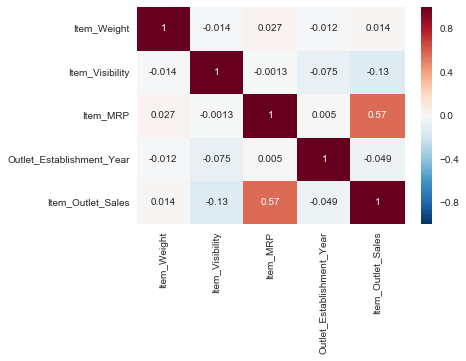

In [9]:
sns.heatmap(df_train.corr(), annot=True)

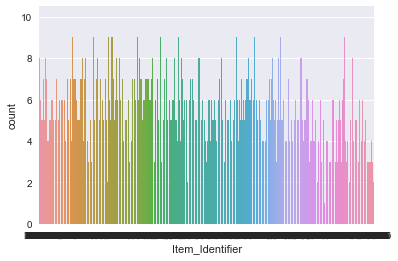

In [10]:
sns.countplot(df_train.Item_Identifier)

In [11]:
# See the number of different item identifiers
len(set(df_train.Item_Identifier))

1559

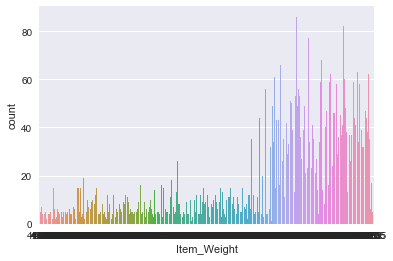

In [12]:
sns.countplot(df_train.Item_Weight)

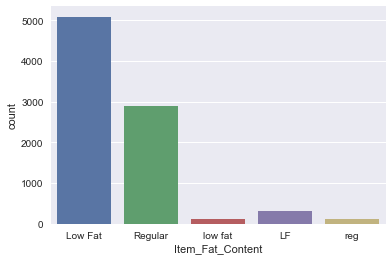

In [13]:
sns.countplot(df_train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

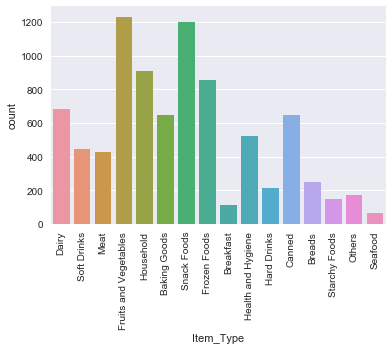

In [14]:
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

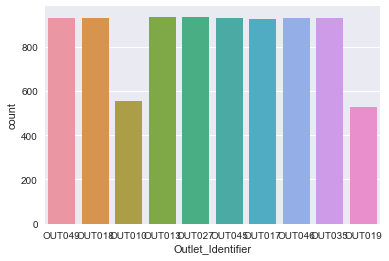

In [15]:
sns.countplot(df_train.Outlet_Identifier)

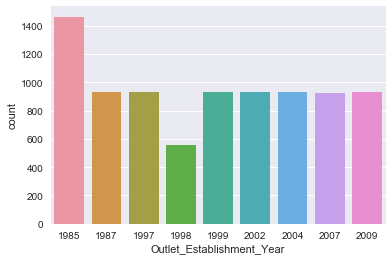

In [16]:
sns.countplot(df_train.Outlet_Establishment_Year)

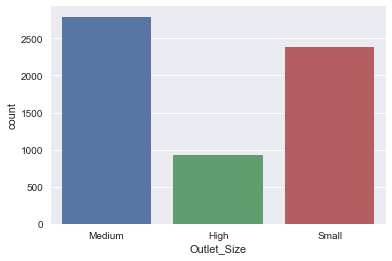

In [17]:
sns.countplot(df_train.Outlet_Size)

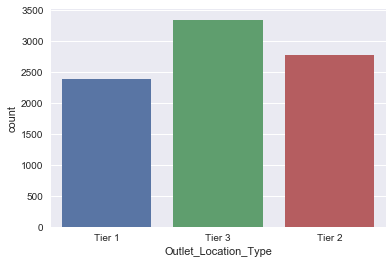

In [18]:
sns.countplot(df_train.Outlet_Location_Type)

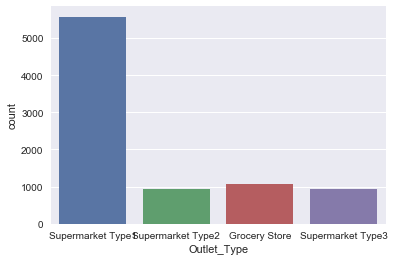

In [19]:
sns.countplot(df_train.Outlet_Type)

We want to see how the categorical data correlate with Item_Outlet_Sales. We can use pivot tables, with the median outlet sales (median instead of mean to reduce impact of outliers) for each category.


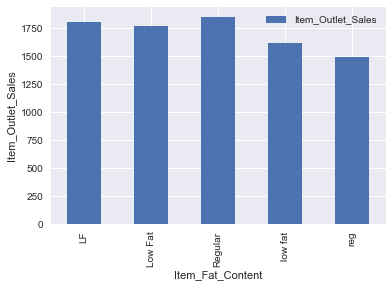

In [20]:
Item_Fat_Content_PivotTable = df_train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_PivotTable.plot(kind='bar')
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show()

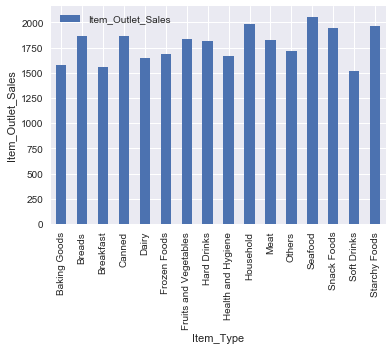

In [21]:
Item_Type_PivotTable = df_train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_PivotTable.plot(kind='bar')
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

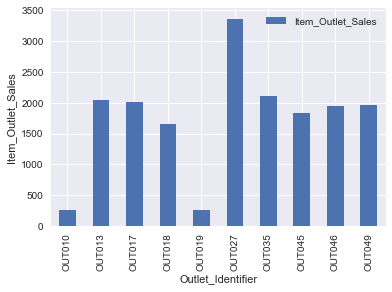

In [22]:
Outlet_Identifier_PivotTable = df_train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_PivotTable.plot(kind='bar')
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

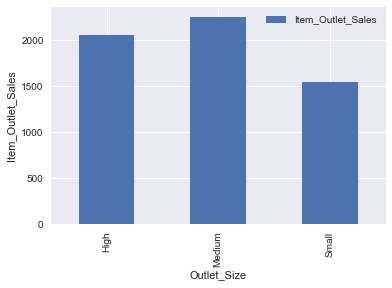

In [23]:
Outlet_Size_PivotTable = df_train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_PivotTable.plot(kind='bar')
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.show()

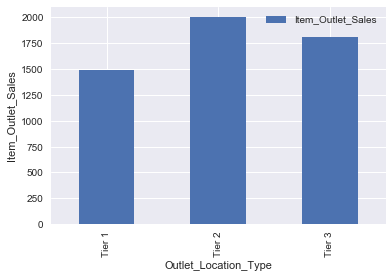

In [24]:
Outlet_Location_Type_PivotTable = df_train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_PivotTable.plot(kind='bar')
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

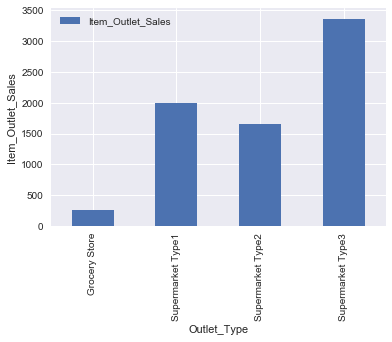

In [25]:
Outlet_Type_PivotTable = df_train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_PivotTable.plot(kind='bar')
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

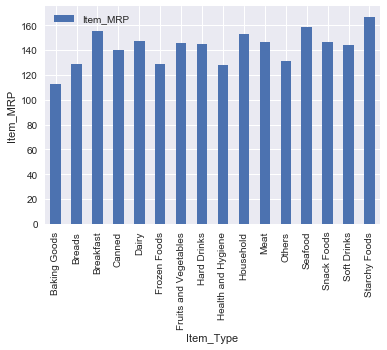

In [26]:
ItemMRP_ItemType_PivotTable = df_train.pivot_table(index='Item_Type', values="Item_MRP", aggfunc=np.median)
ItemMRP_ItemType_PivotTable.plot(kind='bar')
plt.xlabel("Item_Type")
plt.ylabel("Item_MRP")
plt.show()

#### Initial Thoughts

- Item_Identifier - Just the unique identifier of each item. We can drop this column as it will not affect Item_Outlet_Sales. In the training data, there are 1,559 different types of items out of 8,523 entries.


- Item_Weight - From the heatmap, there is very little positive correlation (+0.014) between Item_Weight and Item_Outlet_Sales. The countplot shows that the data consists of more heavier items than light items. Also, there are 1,463 missing values out of 8,523, which is significant, and we need to find a way to impute the missing values.


- Item_Fat_Content - From the barplot, there are 5 bars, but they are duplicated. For example, there is "Regular" and "reg". Also, there is "LF", "Low Fat", and "low fat". Also, for the Item_Type category, it appears that there are non-food items like household products, which should not be in either the "Regular" or "Low Fat" family. We should create another category of "Non-Edible" for such non-food items.


- Item_Visibility - This metric is a measure of how visible the item is to customers. One would think that the more visible the item to customers, the higher the sales, but the heatmap appears to show a slight negative correlation of -0.13. Perhaps customers prefer to stick to their preferred brand of food, rather than an unfamiliar type that is displayed prominently.


- Item_Type - Some item types like seafood have higher outlet sales compared to item types like soft drinks. This makes sense as seafood is generally more expensive. Therefore this is quite an important feature.


- Item_MRP - The heatmap shows a significant positive correlation of +0.57 between manufacturer resale price and the sales. From the barplot of median Item_MRP vs Item_Type, the median price of starchy foods is the highest while the median price of baking goods is the lowest. The minimum MRP is 31 while the maximum is 266, which leads me to believe that it is in a non-USD currency.


- Outlet_Identifier - Some outlets like OUT010 and OUT019 have  much lower outlet sales compared to OUT027. This is likely liked to Outlet_Size, Outlet_Location_Type, Outlet_Type, but I don't think we can drop this feature. For example, a particular outlet could have very good customer service, or little competition in the neighbourhood, which are not considered in the abovementioned features.


- Outlet_Establishment_Year - The heatmap shows a very slight negative correlation between the year of establishment and outlet sales, but I believe we should do some feature engineering to see how long the outlet has been around instead of the year in thousands'.


- Outlet_Size - From the barplot, smaller outlets have less outlet sales, which is not surprising. It has 2,410 missing values out of 8,523, which is significant. This seems to be related to Outlet_Type e.g. grocery store, and we can use info from Outlet_Type to impute missing Outlet_Size values.


- Outlet_Location_Type - From the barplot, Tier 1 outlets have less sales compared to Tier 2 and 3.


- Outlet_Type - There's quite a clear difference, grocery stores have least sales while Type 3 is the clear leader.


- Item_Outlet_Sales - The label we are trying to predict.

### Step 2: Pre-Processing the Data

Join the train and test sets first to do pre-processing at one go, and separate them later.

In [27]:
# Create a "Source" column
# To be able to distinguish train and test datasets later
df_train['Source'] = 'train'
df_test['Source'] = 'test'

# Combine train and test data
df = pd.concat([df_train, df_test], ignore_index = True)
print(df.shape, df_train.shape, df_test.shape)

(14204, 13) (8523, 13) (5681, 12)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


First, let's tackle the missing Item_Weight values. We can do so by finding the mean weight of each Item_Identifier using a pivot table, which should be pretty accurate. Then, impute the missing Item_Weight values with the calculated mean weights.

In [29]:
# Create a pivot table with mean weight for each item identifier
# NaN weight values will be ignored by pivot table function

Mean_Item_Weight = df.pivot_table(index='Item_Identifier', values='Item_Weight')

In [30]:
def impute_weight(cols):

    Identifier = cols[0]
    Weight = cols[1]
    
    if pd.isnull(Weight):
        return Mean_Item_Weight['Item_Weight'][Mean_Item_Weight.index == Identifier]
    else:
        return Weight
    
df['Item_Weight'] = df[['Item_Identifier','Item_Weight']].apply(impute_weight,axis=1).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


Next, let's tackle the missing Outlet_Size values. We create a pivot table of Outlet_Type vs Outlet_Size, where the most common occurrence (mode) of types for each Outlet_Size are used. Then, we impute the missing Outlet_Size values in the dataframe with this info.

In [31]:
Mode_Outlet_Size = df.pivot_table(columns='Outlet_Type', values='Outlet_Size', aggfunc=lambda x:x.mode())
Mode_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [32]:
def impute_outlet_size(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return Mode_Outlet_Size.loc['Outlet_Size'][Mode_Outlet_Size.columns == Type][0]
    else:
        return Size

df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_outlet_size,axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


We can ignore the missing Item_Outlet_sales values, as they are from the test dataset, which is not required for training the model. We saw earlier that the training dataset has no missing values for Item_Outlet_Sales.

### Step 3: Feature Engineering

I believe that the age of the outlet is a better feature than the year of establishment of the outlet, and hence, we will create a column called "Outlet Age" below.

In [33]:
# Data is from the year 2013
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

Remove duplicate labels for Item_Fat_Content. Combine "Regular" and "reg" into "Regular", and "LF", "Low Fat", and "low fat" into "Low Fat".

In [34]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [35]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26


It does not make sense for Item_Type 'Health and Hygiene', 'Household' and 'Others' to have any Item_Fat_Content, hence we'll create a new category under "Item_Fat_Content" called "Non-Edible", and replace the fat content info of 'Health and Hygiene', 'Household' and 'Others' with this.

In [36]:
def replace_item_fat(cols):
    Fat = cols[0]
    Type = cols[1]
    if Type == 'Health and Hygiene' or Type == 'Household' or Type == 'Others':
        return 'Non-Edible'
    else:
        return Fat

df['Item_Fat_Content'] = df[['Item_Fat_Content','Item_Type']].apply(replace_item_fat,axis=1)

In [37]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26


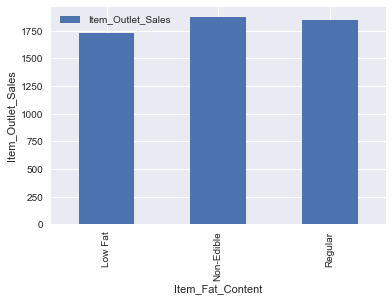

In [38]:
Item_Fat_Content_PivotTable = df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_PivotTable.plot(kind='bar')
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
Outlet_Age                   14204 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.5+ MB


As scikit-learn does not accept categorical features (object type) by default, we will encode the categorical features numerically by using the pandas get_dummies() method.

Note that we'll exclude Item_Identifier and Source columns below as they will be dropped later.

In [40]:
df_dummies = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [41]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 47 columns):
Item_Identifier                    14204 non-null object
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Outlet_Establishment_Year          14204 non-null int64
Source                             14204 non-null object
Outlet_Age                         14204 non-null int64
Item_Fat_Content_Low Fat           14204 non-null uint8
Item_Fat_Content_Non-Edible        14204 non-null uint8
Item_Fat_Content_Regular           14204 non-null uint8
Item_Type_Baking Goods             14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 n

Drop Item_Identifier and Outlet_Establishment_Year from the dataframe.

In [42]:
df_dummies = df_dummies.drop(['Item_Identifier','Outlet_Establishment_Year'], axis = 1)

In [43]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 45 columns):
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Source                             14204 non-null object
Outlet_Age                         14204 non-null int64
Item_Fat_Content_Low Fat           14204 non-null uint8
Item_Fat_Content_Non-Edible        14204 non-null uint8
Item_Fat_Content_Regular           14204 non-null uint8
Item_Type_Baking Goods             14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 non-null uint8
Item_Type_Fruits and Vegetables    14204 no

For the new columns created by get_dummies, one of each category can be deleted. For example, for Outlet_Size, there's high, medium and small, but if an outlet is not high or medium, it can be deduced that it's small. Hence, Outlet_Size_Small can be dropped.

In [44]:
df_dummies = df_dummies.drop(['Item_Fat_Content_Regular','Item_Type_Starchy Foods','Outlet_Identifier_OUT049','Outlet_Location_Type_Tier 3','Outlet_Size_Small','Outlet_Type_Supermarket Type3'], axis = 1)

In [45]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 39 columns):
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Source                             14204 non-null object
Outlet_Age                         14204 non-null int64
Item_Fat_Content_Low Fat           14204 non-null uint8
Item_Fat_Content_Non-Edible        14204 non-null uint8
Item_Type_Baking Goods             14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 non-null uint8
Item_Type_Fruits and Vegetables    14204 non-null uint8
Item_Type_Hard Drinks              14204 no

All pre-processing is complete, we can now split the dataframe back to training and testing sets, based on the 'Source' column, and subsequently drop the 'Source' column.

In [46]:
df_train_dummies = df_dummies.loc[df_dummies['Source']=="train"]
df_test_dummies = df_dummies.loc[df_dummies['Source']=="test"]

df_train_dummies = df_train_dummies.drop(['Source'],axis=1)
df_test_dummies = df_test_dummies.drop(['Item_Outlet_Sales','Source'],axis=1)

df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 38 columns):
Item_MRP                           8523 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_Weight                        8523 non-null float64
Outlet_Age                         8523 non-null int64
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Non-Edible        8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_

In [47]:
df_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 37 columns):
Item_MRP                           5681 non-null float64
Item_Visibility                    5681 non-null float64
Item_Weight                        5681 non-null float64
Outlet_Age                         5681 non-null int64
Item_Fat_Content_Low Fat           5681 non-null uint8
Item_Fat_Content_Non-Edible        5681 non-null uint8
Item_Type_Baking Goods             5681 non-null uint8
Item_Type_Breads                   5681 non-null uint8
Item_Type_Breakfast                5681 non-null uint8
Item_Type_Canned                   5681 non-null uint8
Item_Type_Dairy                    5681 non-null uint8
Item_Type_Frozen Foods             5681 non-null uint8
Item_Type_Fruits and Vegetables    5681 non-null uint8
Item_Type_Hard Drinks              5681 non-null uint8
Item_Type_Health and Hygiene       5681 non-null uint8
Item_Type_Household                5681 non-null uint8
Ite

In [48]:
y = df_train_dummies['Item_Outlet_Sales'].values
print(y.shape)
X = df_train_dummies.drop('Item_Outlet_Sales', axis=1).values
print(X.shape)


(8523,)
(8523, 37)


### Step 4: Model Selection and Tuning

In [49]:
# Linear regression model
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print("Root mean squared error: ", np.sqrt(mean_squared_error(y_valid, y_pred)))

Root mean squared error:  1123.70842675


In [50]:
# Ridge model
steps = [('scaler', StandardScaler()), ('ridge', Ridge())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33)

alphas = np.linspace(10, 50, 15)
parameters = {'ridge__alpha':alphas}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)

print("Tuned hyperparameters: ", cv.best_params_)
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_valid, y_pred)))


Tuned hyperparameters:  {'ridge__alpha': 21.428571428571431}
Root mean squared error:  1123.61936514


In [52]:
# Lasso model
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33)

alphas = np.linspace(4, 20, 15)
parameters = {'lasso__alpha':alphas}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)

print("Tuned hyperparameters: ", cv.best_params_)
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_valid, y_pred)))

Tuned hyperparameters:  {'lasso__alpha': 14.285714285714285}
Root mean squared error:  1124.54938589


In [62]:
# Random Forest model
steps = [('scaler', StandardScaler()), ('random_forest', RandomForestRegressor())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33)

estimators = [200,300,400,500,600]
features = [2,4,6,8,10]
parameters = {'random_forest__n_estimators':estimators,'random_forest__max_features':features}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)

print("Tuned hyperparameters: ", cv.best_params_)
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_valid, y_pred)))

Tuned hyperparameters:  {'random_forest__max_features': 10, 'random_forest__n_estimators': 300}
Root mean squared error:  1104.94901119


### Step 5: Conclusion

Out of linear regression, ridge, lasso, and random forest models, random forest performed the best, with the lowest **RMSE of 1,104.95**.